Le notebook et les données sont à récupérer à partir de : https://github.com/PSIG-EHESS/TAIS


In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import os 

In [3]:
!git clone https://github.com/PSIG-EHESS/TAIS.git 

Cloning into 'TAIS'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 163 (delta 24), reused 72 (delta 9), pack-reused 72
Receiving objects: 100% (163/163), 31.42 MiB | 10.89 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [4]:
csv_folder = "TAIS/donnees/output/"
df_1898 = pd.read_csv(csv_folder + "ban_output_input_682addr.csv")
print("le nombre de lignes de ce tableau est: " + str(len(df_1898)))


le nombre de lignes de ce tableau est: 674


In [5]:
print(list(df_1898))

['nom_voie', 'type_voie', 'NUM', 'PERS', 'ORG', 'STATUT', 'VILLE', 'Liste_imm', 'addr_complet', 'ban_query', 'lat', 'lng', 'score_resp', 'postcode_resp', 'label_resp', 'Unnamed: 15']


In [6]:
pd.set_option('display.max_rows', 500)
from IPython.display import display, HTML
display(df_1898)

,nom_voie,type_voie,NUM,PERS,ORG,STATUT,VILLE,Liste_imm,addr_complet,ban_query,lat,lng,score_resp,postcode_resp,label_resp,Unnamed: 15
0,BOILEAU,impasse,1,Soulard,NaN,NaN,Paris,['1'],1 impasse BOILEAU,https://api-adresse.data.gouv.fr/search/?q=1+i...,NaN,NaN,NaN,NaN,NaN,NaN
1,GOMBOUST,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue GOMBOUST,https://api-adresse.data.gouv.fr/search/?q=1+r...,48.867204,2.333300,0.868066,75001.0,1 Rue Gomboust 75001 Paris,NaN
2,ORME,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue ORME,https://api-adresse.data.gouv.fr/search/?q=1+r...,NaN,NaN,NaN,NaN,NaN,NaN
3,SAINTE-CHAPELLE,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue SAINTE-CHAPELLE,https://api-adresse.data.gouv.fr/search/?q=1+r...,NaN,NaN,NaN,NaN,NaN,NaN
4,HÉGÉSIPPE MOREAU,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue HÉGÉSIPPE MOREAU,https://api-adresse.data.gouv.fr/search/?q=1+r...,48.886787,2.327628,0.883305,75018.0,1 Rue Hégésippe Moreau 75018 Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,VAUOUELIN,rue,294,NaN,NaN,NaN,NaN,['294'],294 rue VAUOUELIN,https://api-adresse.data.gouv.fr/search/?q=294...,48.838085,2.287190,0.362019,75015.0,294 Rue Lecourbe 75015 Paris,NaN
670,FAUBOURG SAINT-ANTOINE,rue,295,Garat,NaN,NaN,Paris,['295'],295 rue FAUBOURG SAINT-ANTOINE,https://api-adresse.data.gouv.fr/search/?q=295...,48.850217,2.382282,0.710795,75012.0,Rue du Faubourg Saint-Antoine 75012 Paris,NaN
671,CHARENTON,rue,303,Fourel,NaN,Vve,Paris,['303'],303 rue CHARENTON,https://api-adresse.data.gouv.fr/search/?q=303...,48.834052,2.394509,0.764756,75012.0,303 Rue de Charenton 75012 Paris,NaN
672,CHARENTON,rue,321,Boutet,NaN,NaN,Paris,['321'],321 rue CHARENTON,https://api-adresse.data.gouv.fr/search/?q=321...,48.833172,2.395924,0.764756,75012.0,321 Rue de Charenton 75012 Paris,NaN


Utilisation de l'API BAN : https://adresse.data.gouv.fr/api-doc/adresse 

Paramètres d'entrée
* q : requete
* lat : latitude en WGS84
* lon : longuitude en WGS84
* autocomplete : recherche d'alternatives
* limit : nombre limite de résultats
* city : donner une priorité géographique par le nom de la ville  
* postcode : donner une priorité géographique par le code postal
* citycode (code INSEE) : idem, avec le code INSEE

La sorties est sérialisée en GeoJSON, les attributs retournés sont :

* id : identifiant de l’adresse (clef d’interopérabilité)
* geometry : ponctuel exprimé en WGS-84 (EPSG 4326)
* type : type de résultat trouvé
* housenumber : numéro « à la plaque »
* street : position « à la voie », placé approximativement au centre de celle-ci
* locality : lieu-dit
* municipality : numéro « à la commune »
* score : valeur de 0 à 1 indiquant la pertinence du résultat
* housenumber : numéro avec indice de répétition éventuel (bis, ter, A, B)
* street : nom de la voie
* name : numéro éventuel et nom de voie ou lieu dit
* postcode : code postal
* citycode : code INSEE de la commune
* city : nom de la commune
* district : nom de l’arrondissement (Paris/Lyon/Marseille)
* oldcitycode : code INSEE de la commune ancienne (le cas échéant)
* oldcity : nom de la commune ancienne (le cas échéant)
* context : n° de département, nom de département et de région
* label : libellé complet de l’adresse
* x : coordonnées géographique en projection légale (Lambert 93)
* y : coordonnées géographique en projection légale (Lambert 93)
* importance : indicateur d’importance (champ technique)





In [7]:
# 18 rue Abbé de l'épée
!curl "https://api-adresse.data.gouv.fr/search/?q=18%20rue%20de%20l'ABB%C3%89%20DE%20L'%C3%89P%C3%89E&autocomplete=1"

{"type":"FeatureCollection","version":"draft","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[3.874244,43.621544]},"properties":{"label":"18 Rue de l'Abbé de l'Epée 34090 Montpellier","score":0.8840618181818181,"housenumber":"18","id":"34172_0025_00018","name":"18 Rue de l'Abbé de l'Epée","postcode":"34090","citycode":"34172","x":770583.97,"y":6280667.94,"city":"Montpellier","context":"34, Hérault, Occitanie","type":"housenumber","importance":0.72468,"street":"Rue de l'Abbé de l'Epée"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[0.32002,46.569141]},"properties":{"label":"18 Rue de l'Abbe de l'Epée 86000 Poitiers","score":0.88103,"housenumber":"18","id":"86194_0010_00018","name":"18 Rue de l'Abbe de l'Epée","postcode":"86000","citycode":"86194","x":494773.01,"y":6611161.57,"city":"Poitiers","context":"86, Vienne, Nouvelle-Aquitaine","type":"housenumber","importance":0.69133,"street":"Rue de l'Abbe de l'Epée"}},{"type":"Feature","geometry":{"type"

Sortie en GeoJson : https://geojson.org/


```
{"type":"FeatureCollection",
  "features":[

    {"type":"Feature",
    "geometry":{"type":"Point","coordinates":[3.874244,43.621544]},
    "properties":
      {"label":"18 Rue de l'Abbé de l'Epée 34090 Montpellier",
      "score":0.8840618181818181,
      "housenumber":"18",
      "id":"34172_0025_00018",
      "name":"18 Rue de l'Abbé de l'Epée",
      "postcode":"34090",
      "citycode":"34172",
      "x":770583.97,
      "y":6280667.94,
      "city":"Montpellier",
      "context":"34, Hérault, Occitanie",
      "type":"housenumber","
      importance":0.72468,
      "street":"Rue de l'Abbé de l'Epée"}},

    {"type":"Feature",
    "geometry":{"type":"Point","coordinates":[0.32002,46.569141]},
    "properties":
      {"label":"18 Rue de l'Abbe de l'Epée 86000 Poitiers",
      "score":0.88103,
      "housenumber":"18",
      "id":"86194_0010_00018",
      "name":"18 Rue de l'Abbe de l'Epée",
      "postcode":"86000",
      "citycode":"86194",
      "x":494773.01,
      "y":6611161.57,
      "city":"Poitiers",
      "context":"86, Vienne, Nouvelle-Aquitaine",
      "type":"housenumber",
      "importance":0.69133,
      "street":"Rue de l'Abbe de l'Epée"}},
      
      ...
      
      {"type":"Feature",
      "geometry":{"type":"Point","coordinates":[2.339927,48.843821]},
      "properties":{
        "label":"18 Rue de l'Abbé de l'Epée 75005 Paris",
        "score":0.8775072727272727,
        "housenumber":"18",
        "id":"75105_0006_00018",
        "name":"18 Rue de l'Abbé de l'Epée",
        "postcode":"75005",
        "citycode":"75105",
        "x":651556.66,
        "y":6860621.81,
        "city":"Paris",
        "district":"Paris 5e Arrondissement",
        "context":"75, Paris, Île-de-France",
        "type":"housenumber",
        "importance":0.65258,
        "street":"Rue de l'Abbé de l'Epée"}},
        
        ...],
    "attribution":"BAN",
    "licence":"ETALAB-2.0",
    "query":"18 rue de l'ABBÉ DE L'ÉPÉE",
    "limit":5}

```


NB : le score prend essentiellement en compte la portion du texte cherché présente dans l’adresse du référentiel + un peu de levenshtein pour tenir compte de l’ordre (celui ci gère mieux les cas comme « Avenue de Paris Saint-Mandé » / « Avenue de Saint Mande Paris »). Le score est aussi ajusté en cas de préférence géographique (lat/lon) en réduisant la valeur « importance »
(https://addok.readthedocs.io/en/latest/faq/)

In [8]:
df_1898.isnull().sum() 

nom_voie           0
type_voie          0
NUM                0
PERS             148
ORG              644
STATUT           559
VILLE            140
Liste_imm          0
addr_complet       0
ban_query          0
lat              104
lng              104
score_resp       104
postcode_resp    104
label_resp       105
Unnamed: 15      673
dtype: int64

In [9]:
#https://geopandas.org/

!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import geopandas

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [20]:
gdf_addr_paris_1898 = geopandas.GeoDataFrame(
    df_1898, geometry=geopandas.points_from_xy(df_1898.lng, df_1898.lat))

gdf_addr_paris_1898.set_crs("EPSG:4326")


,nom_voie,type_voie,NUM,PERS,ORG,STATUT,VILLE,Liste_imm,addr_complet,ban_query,lat,lng,score_resp,postcode_resp,label_resp,Unnamed: 15,geometry
0,BOILEAU,impasse,1,Soulard,NaN,NaN,Paris,['1'],1 impasse BOILEAU,https://api-adresse.data.gouv.fr/search/?q=1+i...,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
1,GOMBOUST,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue GOMBOUST,https://api-adresse.data.gouv.fr/search/?q=1+r...,48.867204,2.333300,0.868066,75001.0,1 Rue Gomboust 75001 Paris,NaN,POINT (2.33330 48.86720)
2,ORME,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue ORME,https://api-adresse.data.gouv.fr/search/?q=1+r...,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
3,SAINTE-CHAPELLE,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue SAINTE-CHAPELLE,https://api-adresse.data.gouv.fr/search/?q=1+r...,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
4,HÉGÉSIPPE MOREAU,rue,1,NaN,NaN,NaN,NaN,['1'],1 rue HÉGÉSIPPE MOREAU,https://api-adresse.data.gouv.fr/search/?q=1+r...,48.886787,2.327628,0.883305,75018.0,1 Rue Hégésippe Moreau 75018 Paris,NaN,POINT (2.32763 48.88679)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,VAUOUELIN,rue,294,NaN,NaN,NaN,NaN,['294'],294 rue VAUOUELIN,https://api-adresse.data.gouv.fr/search/?q=294...,48.838085,2.287190,0.362019,75015.0,294 Rue Lecourbe 75015 Paris,NaN,POINT (2.28719 48.83808)
670,FAUBOURG SAINT-ANTOINE,rue,295,Garat,NaN,NaN,Paris,['295'],295 rue FAUBOURG SAINT-ANTOINE,https://api-adresse.data.gouv.fr/search/?q=295...,48.850217,2.382282,0.710795,75012.0,Rue du Faubourg Saint-Antoine 75012 Paris,NaN,POINT (2.38228 48.85022)
671,CHARENTON,rue,303,Fourel,NaN,Vve,Paris,['303'],303 rue CHARENTON,https://api-adresse.data.gouv.fr/search/?q=303...,48.834052,2.394509,0.764756,75012.0,303 Rue de Charenton 75012 Paris,NaN,POINT (2.39451 48.83405)
672,CHARENTON,rue,321,Boutet,NaN,NaN,Paris,['321'],321 rue CHARENTON,https://api-adresse.data.gouv.fr/search/?q=321...,48.833172,2.395924,0.764756,75012.0,321 Rue de Charenton 75012 Paris,NaN,POINT (2.39592 48.83317)


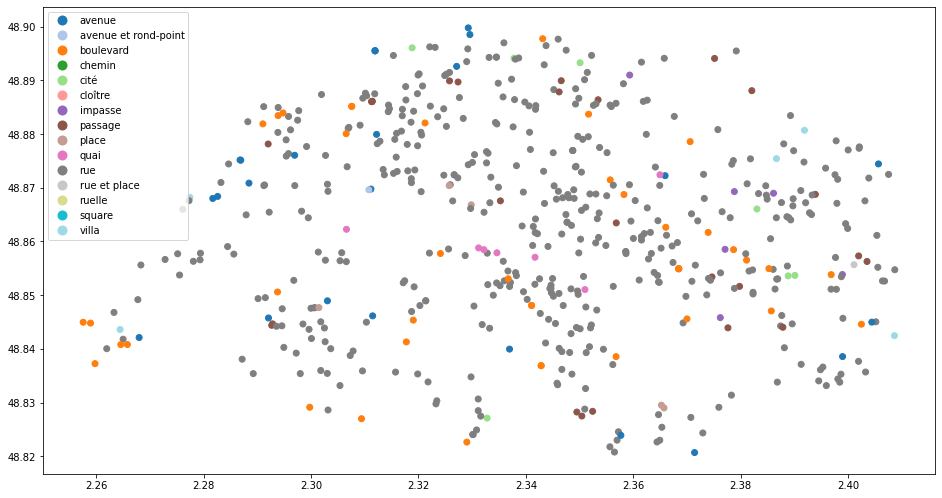

In [12]:
gdf_addr_paris_1898.plot(column='type_voie', categorical=True, legend=True, cmap='tab20', figsize=(16, 16))

In [13]:
vector_folder = "TAIS/donnees/vecteurs/"
gdf_quartier = geopandas.read_file(vector_folder+"quartier_paris.shp", encoding='utf-8')  

In [14]:
gdf_quartier = gdf_quartier.set_index("n_sq_qu")
gdf_quartier

,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry
n_sq_qu,,,,,,,,
750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ..."
750000016.0,16.0,7510404.0,Notre-Dame,4.0,750000004.0,3283.163371,3.782522e+05,"POLYGON ((2.36131 48.84858, 2.36151 48.84823, ..."
750000028.0,28.0,7510704.0,Gros-Caillou,7.0,750000007.0,4720.994373,1.381893e+06,"POLYGON ((2.30954 48.85396, 2.30646 48.85413, ..."
750000041.0,41.0,7511101.0,Folie-Méricourt,11.0,750000011.0,3724.352694,7.257525e+05,"POLYGON ((2.37010 48.86376, 2.36690 48.86246, ..."
750000007.0,7.0,7510203.0,Mail,2.0,750000002.0,2179.153605,2.781426e+05,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ..."
750000049.0,49.0,7511301.0,Salpêtrière,13.0,750000013.0,4759.096239,1.181560e+06,"POLYGON ((2.35636 48.83104, 2.35615 48.83097, ..."
750000008.0,8.0,7510204.0,Bonne-Nouvelle,2.0,750000002.0,2233.976030,2.814482e+05,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ..."
750000004.0,4.0,7510104.0,Place-Vendôme,1.0,750000001.0,2147.817602,2.694568e+05,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
750000050.0,50.0,7511302.0,Gare,13.0,750000013.0,7070.350567,3.044178e+06,"POLYGON ((2.36771 48.81742, 2.36696 48.81719, ..."


In [15]:
gdf_quartier.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

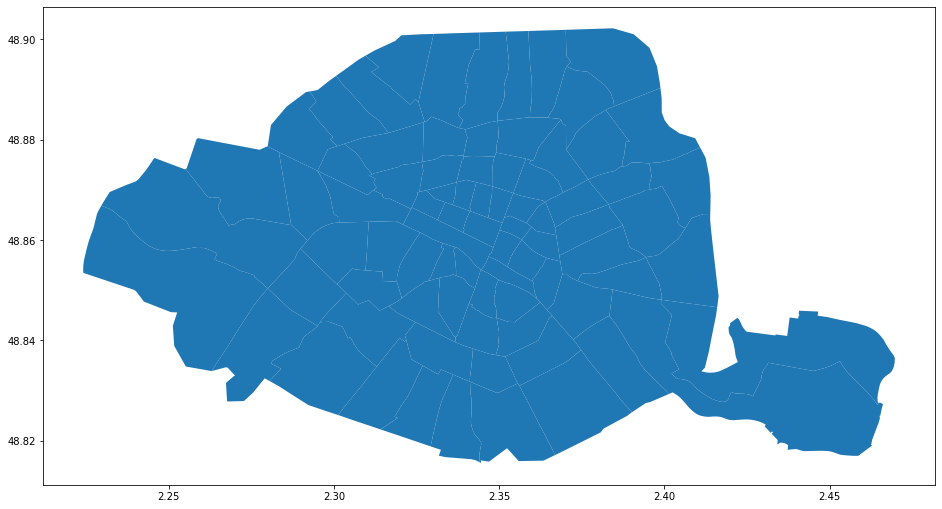

In [16]:
gdf_quartier["geometry"].plot(figsize=(16, 16))

In [17]:
gdf_quartier.explore("l_qu", categorical=True)

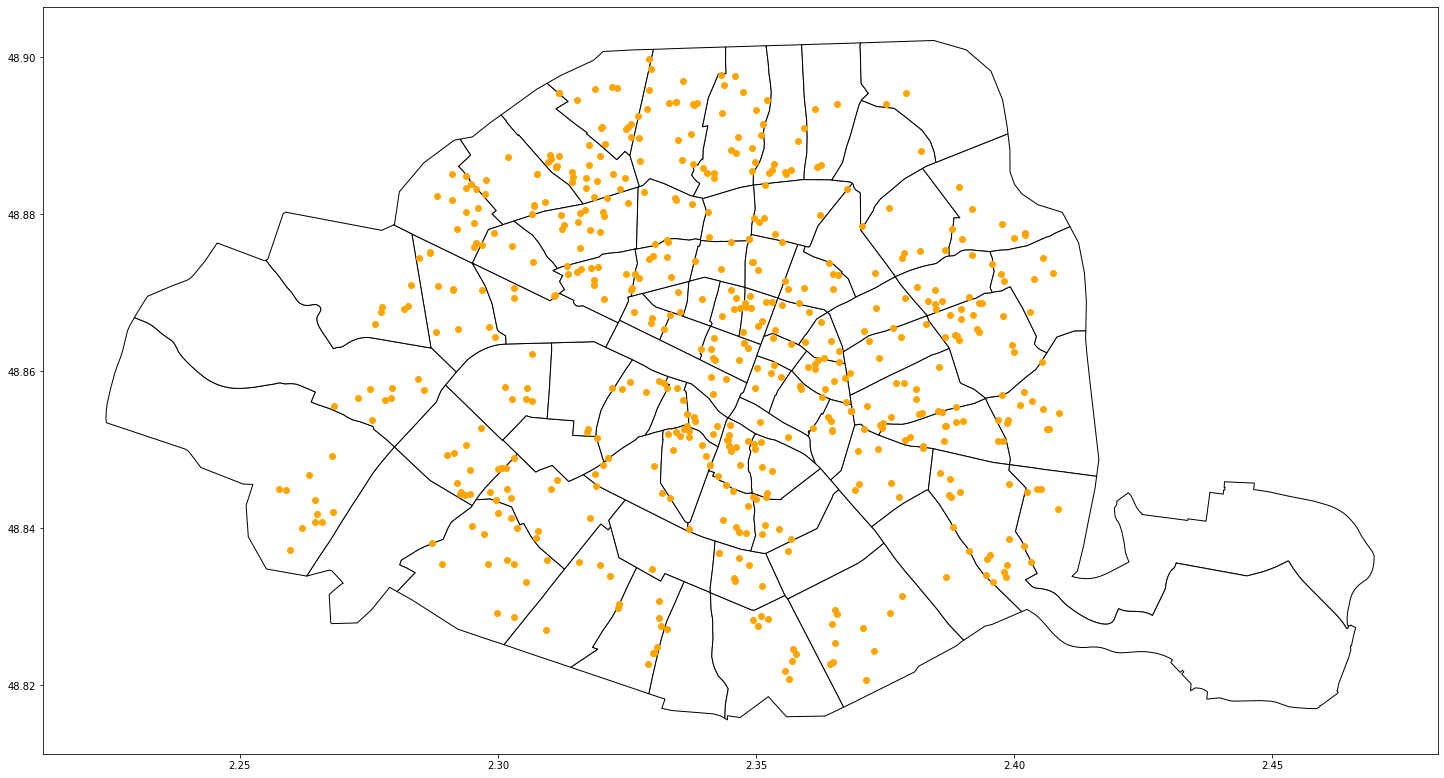

In [23]:
gdf_addr_paris_1898.crs = "EPSG:4326"
gdf_addr_paris_1898.to_crs("EPSG:3857")
gdf_quartier.to_crs("EPSG:3857")

ax = gdf_quartier.plot(figsize = (25, 22), color='white', edgecolor='black')
gdf_addr_paris_1898.plot(ax = ax, color='orange')

In [25]:
gdf_addr_paris_1898['NUM'].sample(20)

41      2
20      1
226    13
338    23
311    20
302    19
92      5
560    84
568    89
168     8
256    15
121     6
533    68
209    12
289    17
382    29
266    16
458    44
516    63
44      2
Name: NUM, dtype: int64

In [26]:
gdf_addr_paris_1898['NUM'].describe()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

count    674.000000
mean      44.387240
std       54.931187
min        1.000000
25%        8.000000
50%       23.000000
75%       59.000000
max      348.000000
Name: NUM, dtype: float64

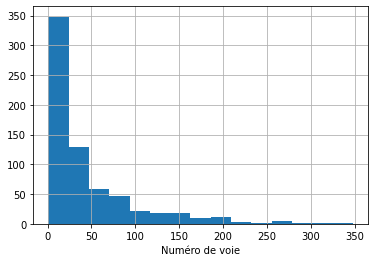

In [27]:
import matplotlib.pyplot as plt

gdf_addr_paris_1898['NUM'].hist(bins=15)
plt.xlabel('Numéro de voie')
plt.show()

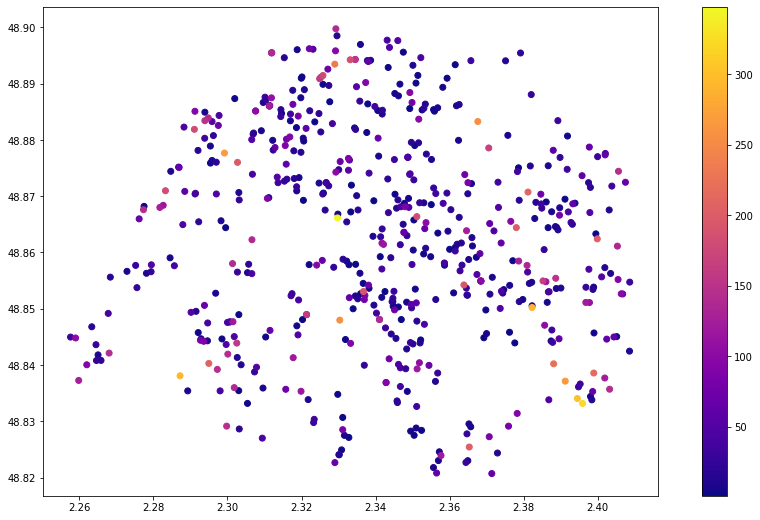

In [28]:
gdf_addr_paris_1898.plot(
    column='NUM', 
    figsize=(16, 9),
    cmap='plasma', 
    legend=True,
)

# schema de couleurs : https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png 

Méthodes de classification disponibles : 
*   Quantiles
*   BoxPlot
*   EqualInterval
*   NaturalBreaks
*   Percentiles
*   *Jenks
*   StdMean



**EQUAL INTERVAL** divise les données en classes de taille égale (par exemple, 0-10, 10-20, 20-30, etc.) et fonctionne mieux avec des données qui sont généralement réparties sur toute la plage. 

ATTENTION : évitez l'intervalle égal si vos données tendent à une extrémité ou si vous avez une ou deux valeurs aberrantes vraiment importantes.

In [30]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import mapclassify
mapclassify.EqualInterval(gdf_addr_paris_1898.NUM, k=5)

EqualInterval           

    Interval       Count
------------------------
[  1.00,  70.40] |   536
( 70.40, 139.80] |    86
(139.80, 209.20] |    39
(209.20, 278.60] |     8
(278.60, 348.00] |     5

**QUANTILES** essaie de classer le même nombre d'observations dans chacune des N classes. En d'autres termes, cette méthode essaie d'organiser les groupes de façon à ce qu'ils aient la même quantité. Le problème avec les quantiles est que vous pouvez vous retrouver avec des classes qui ont des plages numériques très différentes (par exemple, 1-4, 4-9, 9-250).

In [34]:
mapclassify.Quantiles(gdf_addr_paris_1898.NUM, k=5)

Quantiles               

    Interval       Count
------------------------
[  1.00,   7.00] |   149
(  7.00,  16.00] |   133
( 16.00,  32.00] |   123
( 32.00,  71.40] |   134
( 71.40, 348.00] |   135

**NATURAL BREAKS (Jenks)** organise chaque groupe de manière à ce qu'il y ait moins de variation dans chaque classe ou nuance.

est une sorte de schéma de classification "optimal" qui trouve les ruptures de classe qui minimiseront la variance intra-classe et maximiseront les différences entre les classes. Un inconvénient de cette approche est que chaque ensemble de données génère une solution de classification unique, et si vous avez besoin de faire des comparaisons entre les cartes, comme dans un atlas ou une série (par exemple, une carte pour 1980, 1990, 2000), vous voudrez peut-être utiliser un seul schéma qui peut être appliqué à toutes les cartes.



In [36]:
mapclassify.NaturalBreaks(gdf_addr_paris_1898.NUM, k=5)

NaturalBreaks           

    Interval       Count
------------------------
[  1.00,  27.00] |   368
( 27.00,  68.00] |   167
( 68.00, 127.00] |    82
(127.00, 222.00] |    47
(222.00, 348.00] |    10

Pour plus d'informations : https://gisgeography.com/choropleth-maps-data-classification/#equal-interval-data-classification 

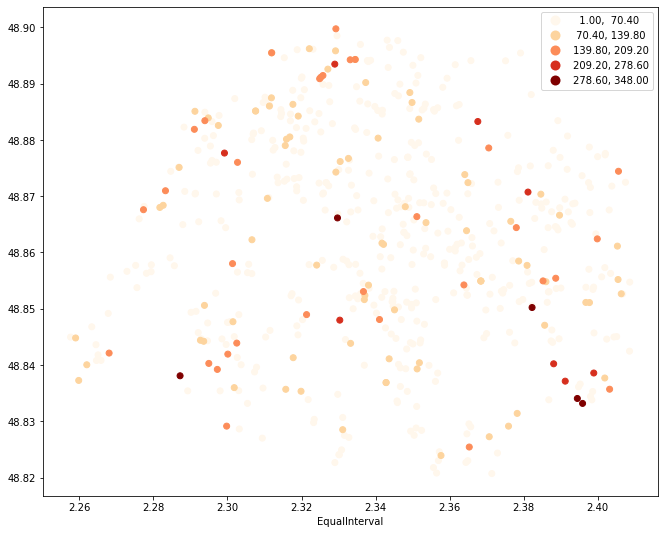

In [39]:
gdf_addr_paris_1898.plot(column='NUM', scheme='EqualInterval', k=5, figsize=(16, 9), cmap='OrRd', legend=True)
plt.xlabel('EqualInterval')
plt.show()


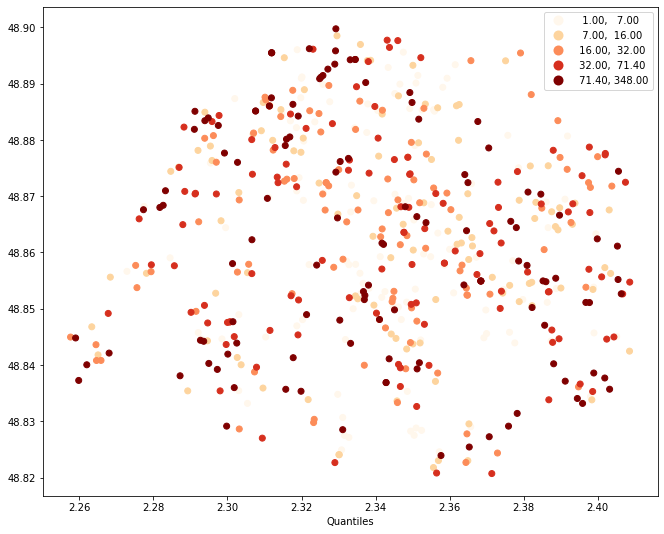

In [40]:
gdf_addr_paris_1898.plot(column='NUM', scheme='Quantiles', k=5, figsize=(16, 9), cmap='OrRd', legend=True)
plt.xlabel('Quantiles')
plt.show()

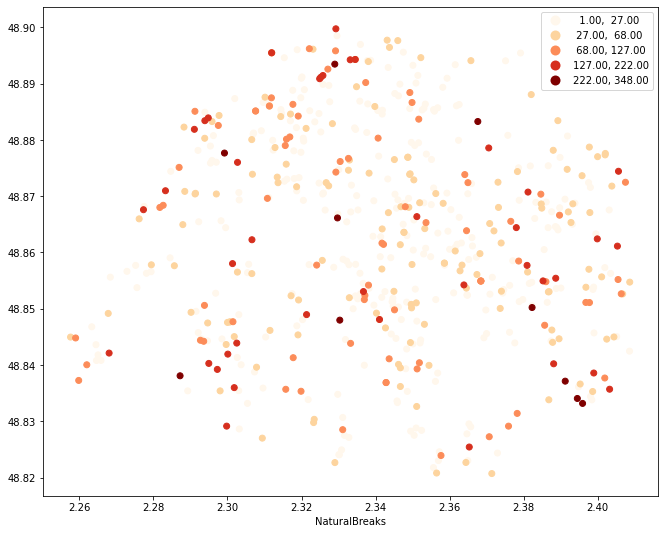

In [41]:
gdf_addr_paris_1898.plot(column='NUM', scheme='NaturalBreaks', k=5, figsize=(16, 9), cmap='OrRd', legend=True )
plt.xlabel('NaturalBreaks')
plt.show()